In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append('D:\KKU\ปี3\subject\CP412003 Data Science\lab\lab3\MelbourneHousing_DS')


#Dataset: Melbourne Housing Snapshot

**ดาวน์โหลดข้อมูลจาก**
https://drive.google.com/file/d/1zRxc0S0ZecZnTCVvrSjw8nycyNrQ59_B/view?usp=sharing

##About Dataset

13580 rows, 21 columns

**Content**

> The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

###Notes on Specific Variables

**`Rooms`**: Number of rooms

**`Price`**: Price in dollars

**`Method`**:
* S - property sold;
* SP - property sold prior;
* PI - property passed in;
* PN - sold prior not disclosed;
* SN - sold not disclosed;
* NB - no bid;
* VB - vendor bid;
* W - withdrawn prior to auction;
* SA - sold after auction;
* SS - sold after auction price not disclosed.
* N/A - price or highest bid not available.

**`Type`**:
* br - bedroom(s);
* h - house,cottage,villa, semi,terrace;
* u - unit, duplex;
* t - townhouse;
* dev site - development site;
* o res - other residential.

**`SellerG`**: Real Estate Agent

**`Date`**: Date sold

**`Distance`**: Distance from CBD

**`Regionname`**: General Region (West, North West, North, North east …etc)

**`Propertycount`**: Number of properties that exist in the suburb.

**`Bedroom2`** : Scraped # of Bedrooms (from different source)

**`Bathroom`**: Number of Bathrooms

**`Car`**: Number of carspots

**`Landsize`**: Land Size

**`BuildingArea`**: Building Size

**`CouncilArea`**: Governing council for the area

ข้อมูลของราคาขายบ้านใน Melbourne มีข้อมูล 3 ไฟล์ ได้แก่
* Suburb_data.csv: ข้อมูลของเขตชานเมือง
* house_data.csv: ข้อมูลบ้าน
* sale_data.csv: ข้อมูลการขาย

In [14]:
#read data
Suburb = pd.read_csv('D:\KKU\ปี3\subject\CP412003 Data Science\lab\lab3\MelbourneHousing_DS\Suburb_data.csv')
house = pd.read_csv('D:\KKU\ปี3\subject\CP412003 Data Science\lab\lab3\MelbourneHousing_DS\house_data.csv')
sale = pd.read_csv('D:\KKU\ปี3\subject\CP412003 Data Science\lab\lab3\MelbourneHousing_DS\sale_data.csv')

display(Suburb.head())
display(house.head())
display(sale.head())


,Suburb,Regionname,Postcode,Propertycount
0,Abbotsford,Northern Metropolitan,3067.0,4019.0
1,Airport West,Western Metropolitan,3042.0,3464.0
2,Albert Park,Southern Metropolitan,3206.0,3280.0
3,Alphington,Northern Metropolitan,3078.0,2211.0
4,Altona,Western Metropolitan,3018.0,5301.0


,Suburb,Address,Lattitude,Longtitude,Distance,Type,Rooms,Bedroom2,Bathroom,Landsize
0,Abbotsford,85 Turner St,-37.7996,144.9984,2.5,h,2,2.0,1.0,202.0
1,Abbotsford,25 Bloomburg St,-37.8079,144.9934,2.5,h,2,2.0,1.0,156.0
2,Abbotsford,5 Charles St,-37.8093,144.9944,2.5,h,3,3.0,2.0,134.0
3,Abbotsford,40 Federation La,-37.7969,144.9969,2.5,h,3,3.0,2.0,94.0
4,Abbotsford,55a Park St,-37.8072,144.9941,2.5,h,4,3.0,1.0,120.0


,sale_no,Address,CouncilArea,YearBuilt,BuildingArea,Car,Price,Date,Method,SellerG
0,1,85 Turner St,Yarra,NaN,NaN,1.0,1480000.0,3/12/2016,S,Biggin
1,2,25 Bloomburg St,Yarra,1900.0,79.0,0.0,1035000.0,4/02/2016,S,Biggin
2,3,5 Charles St,Yarra,1900.0,150.0,0.0,1465000.0,4/03/2017,SP,Biggin
3,4,40 Federation La,Yarra,NaN,NaN,1.0,850000.0,4/03/2017,PI,Biggin
4,5,55a Park St,Yarra,2014.0,142.0,2.0,1600000.0,4/06/2016,VB,Nelson


#DataMart


*   [pandas.DataFrame.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)
*   [pandas Merge, join, concatenate and compare](https://pandas.pydata.org/docs/user_guide/merging.html)



In [15]:
Suburb_House = pd.merge(left=Suburb, right=house, on='Suburb', how='inner')
Suburb_House

,Suburb,Regionname,Postcode,Propertycount,Address,Lattitude,Longtitude,Distance,Type,Rooms,Bedroom2,Bathroom,Landsize
0,Abbotsford,Northern Metropolitan,3067.0,4019.0,85 Turner St,-37.79960,144.99840,2.5,h,2,2.0,1.0,202.0
1,Abbotsford,Northern Metropolitan,3067.0,4019.0,25 Bloomburg St,-37.80790,144.99340,2.5,h,2,2.0,1.0,156.0
2,Abbotsford,Northern Metropolitan,3067.0,4019.0,5 Charles St,-37.80930,144.99440,2.5,h,3,3.0,2.0,134.0
3,Abbotsford,Northern Metropolitan,3067.0,4019.0,40 Federation La,-37.79690,144.99690,2.5,h,3,3.0,2.0,94.0
4,Abbotsford,Northern Metropolitan,3067.0,4019.0,55a Park St,-37.80720,144.99410,2.5,h,4,3.0,1.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13507,Attwood,Northern Metropolitan,3049.0,1130.0,2 Herod Pl,-37.67379,144.89826,16.5,h,3,3.0,2.0,607.0
13508,Wallan,Northern Victoria,3756.0,3988.0,14 Danaher Av,-37.40853,144.97749,44.2,h,3,3.0,1.0,502.0
13509,New Gisborne,Northern Victoria,3438.0,849.0,71 Hamilton Rd,-37.45392,144.58864,48.1,h,5,5.0,3.0,44500.0
13510,Plumpton,Western Metropolitan,3335.0,1490.0,9 Remy Av,-37.71429,144.72492,23.8,h,4,4.0,2.0,477.0


In [16]:
df_full = pd.merge(left=sale, right=Suburb_House, on='Address',how='inner')
df_full

,sale_no,Address,CouncilArea,YearBuilt,BuildingArea,Car,Price,Date,Method,SellerG,...,Postcode,Propertycount,Lattitude,Longtitude,Distance,Type,Rooms,Bedroom2,Bathroom,Landsize
0,1,85 Turner St,Yarra,NaN,NaN,1.0,1480000.0,3/12/2016,S,Biggin,...,3067.0,4019.0,-37.79960,144.99840,2.5,h,2,2.0,1.0,202.0
1,2,25 Bloomburg St,Yarra,1900.0,79.0,0.0,1035000.0,4/02/2016,S,Biggin,...,3067.0,4019.0,-37.80790,144.99340,2.5,h,2,2.0,1.0,156.0
2,3,5 Charles St,Yarra,1900.0,150.0,0.0,1465000.0,4/03/2017,SP,Biggin,...,3067.0,4019.0,-37.80930,144.99440,2.5,h,3,3.0,2.0,134.0
3,3,5 Charles St,Yarra,1900.0,150.0,0.0,1465000.0,4/03/2017,SP,Biggin,...,3146.0,10412.0,-37.85090,145.09160,9.2,h,4,4.0,2.0,659.0
4,3,5 Charles St,Yarra,1900.0,150.0,0.0,1465000.0,4/03/2017,SP,Biggin,...,3020.0,4217.0,-37.77490,144.83290,13.3,h,4,4.0,2.0,570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13857,13576,12 Strada Cr,NaN,1981.0,NaN,2.0,1245000.0,26/08/2017,S,Barry,...,3150.0,7392.0,-37.90562,145.16761,16.7,h,4,4.0,2.0,652.0
13858,13577,77 Merrett Dr,NaN,1995.0,133.0,2.0,1031000.0,26/08/2017,SP,Williams,...,3016.0,6380.0,-37.85927,144.87904,6.8,h,3,3.0,2.0,333.0
13859,13578,83 Power St,NaN,1997.0,NaN,4.0,1170000.0,26/08/2017,S,Raine,...,3016.0,6380.0,-37.85274,144.88738,6.8,h,3,3.0,2.0,436.0
13860,13579,96 Verdon St,NaN,1920.0,157.0,5.0,2500000.0,26/08/2017,PI,Sweeney,...,3016.0,6380.0,-37.85908,144.89299,6.8,h,4,4.0,1.0,866.0


# Clean

In [17]:
def missing_percentage(df_missing):
  missing_count = df_missing.isnull().sum()
  total_cells = np.prod(df_missing.shape)
  total_missing = missing_count.sum()
  missing_percent = total_missing *100 /total_cells
  print('Total cells: {}' . format(total_cells))
  print('Total missing values: {}' . format(total_missing))
  print('missing: {} %' . format(missing_percent))

In [18]:
df = df_full.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13862 entries, 0 to 13861
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sale_no        13862 non-null  int64  
 1   Address        13862 non-null  object 
 2   CouncilArea    12468 non-null  object 
 3   YearBuilt      8379 non-null   float64
 4   BuildingArea   7289 non-null   float64
 5   Car            13798 non-null  float64
 6   Price          13862 non-null  float64
 7   Date           13862 non-null  object 
 8   Method         13862 non-null  object 
 9   SellerG        13862 non-null  object 
 10  Suburb         13862 non-null  object 
 11  Regionname     13862 non-null  object 
 12  Postcode       13862 non-null  float64
 13  Propertycount  13862 non-null  float64
 14  Lattitude      13862 non-null  float64
 15  Longtitude     13862 non-null  float64
 16  Distance       13862 non-null  float64
 17  Type           13862 non-null  object 
 18  Rooms 

##Explore missing & invalid

In [19]:
##Invalid data type
#'Date' <--- (Date)
#'Postcode' <--- (category)
#'Propertycount' <--- (int64)
#'Bedroom2' <--- (int64)
#'Bathroom' <--- (int64)

#'YearBuilt' <--- (category, int64)
#'Car' <--- (int64)

In [20]:
##Missing values:
#'CouncilArea'
#'BuildingArea'

#'YearBuilt'
#'Car'

In [21]:
df[df.isnull().any(axis=1)]

,sale_no,Address,CouncilArea,YearBuilt,BuildingArea,Car,Price,Date,Method,SellerG,...,Postcode,Propertycount,Lattitude,Longtitude,Distance,Type,Rooms,Bedroom2,Bathroom,Landsize
0,1,85 Turner St,Yarra,NaN,NaN,1.0,1480000.0,3/12/2016,S,Biggin,...,3067.0,4019.0,-37.79960,144.99840,2.5,h,2,2.0,1.0,202.0
5,4,40 Federation La,Yarra,NaN,NaN,1.0,850000.0,4/03/2017,PI,Biggin,...,3067.0,4019.0,-37.79690,144.99690,2.5,h,3,3.0,2.0,94.0
7,6,129 Charles St,Yarra,NaN,NaN,0.0,941000.0,7/05/2016,S,Jellis,...,3067.0,4019.0,-37.80410,144.99530,2.5,h,2,2.0,1.0,181.0
10,9,6/241 Nicholson St,Yarra,NaN,NaN,1.0,300000.0,8/10/2016,S,Biggin,...,3067.0,4019.0,-37.80080,144.99730,2.5,u,1,1.0,1.0,0.0
12,11,411/8 Grosvenor St,Yarra,NaN,NaN,1.0,700000.0,12/11/2016,VB,Jellis,...,3067.0,4019.0,-37.81100,145.00670,2.5,u,2,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13857,13576,12 Strada Cr,NaN,1981.0,NaN,2.0,1245000.0,26/08/2017,S,Barry,...,3150.0,7392.0,-37.90562,145.16761,16.7,h,4,4.0,2.0,652.0
13858,13577,77 Merrett Dr,NaN,1995.0,133.0,2.0,1031000.0,26/08/2017,SP,Williams,...,3016.0,6380.0,-37.85927,144.87904,6.8,h,3,3.0,2.0,333.0
13859,13578,83 Power St,NaN,1997.0,NaN,4.0,1170000.0,26/08/2017,S,Raine,...,3016.0,6380.0,-37.85274,144.88738,6.8,h,3,3.0,2.0,436.0
13860,13579,96 Verdon St,NaN,1920.0,157.0,5.0,2500000.0,26/08/2017,PI,Sweeney,...,3016.0,6380.0,-37.85908,144.89299,6.8,h,4,4.0,1.0,866.0


###Missing_percentage

In [22]:
missing_percentage(df)

Total cells: 304964
Total missing values: 13514
missing: 4.431342715861544 %


In [23]:
missing_percentage(df[['CouncilArea']])

Total cells: 13862
Total missing values: 1394
missing: 10.056268936661377 %


In [24]:
missing_percentage(df[['YearBuilt']])

Total cells: 13862
Total missing values: 5483
missing: 39.55417688645217 %


In [25]:
missing_percentage(df[['BuildingArea']])

Total cells: 13862
Total missing values: 6573
missing: 47.417400086567596 %


In [26]:
missing_percentage(df[['Car']])

Total cells: 13862
Total missing values: 64
missing: 0.4616938392728322 %


###Explore by 'Address'

In [27]:
df['Address'].value_counts()

Address
5 Charles St        9
14 Arthur St        9
53 William St       9
5 Margaret St       9
13 Robinson St      9
                   ..
16 Alleford St      1
2/1073 Centre Rd    1
14 Columbia St      1
21 Hardy Ct         1
6 Agnes St          1
Name: count, Length: 13378, dtype: int64

In [28]:
df['Address'].value_counts()[df['Address'].value_counts()>1]

Address
5 Charles St              9
14 Arthur St              9
53 William St             9
5 Margaret St             9
13 Robinson St            9
                         ..
2/27 Pakington St         2
99 Neill St               2
1/16 Mawbey St            2
16/43 Arndt Rd            2
2/60 Kororoit Creek Rd    2
Name: count, Length: 193, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13862 entries, 0 to 13861
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sale_no        13862 non-null  int64  
 1   Address        13862 non-null  object 
 2   CouncilArea    12468 non-null  object 
 3   YearBuilt      8379 non-null   float64
 4   BuildingArea   7289 non-null   float64
 5   Car            13798 non-null  float64
 6   Price          13862 non-null  float64
 7   Date           13862 non-null  object 
 8   Method         13862 non-null  object 
 9   SellerG        13862 non-null  object 
 10  Suburb         13862 non-null  object 
 11  Regionname     13862 non-null  object 
 12  Postcode       13862 non-null  float64
 13  Propertycount  13862 non-null  float64
 14  Lattitude      13862 non-null  float64
 15  Longtitude     13862 non-null  float64
 16  Distance       13862 non-null  float64
 17  Type           13862 non-null  object 
 18  Rooms 

In [30]:
# Calculate value counts
df_counts = df['Address'].value_counts()

# Filter with counts greater than xx
sale_more_than_one = df_counts[df_counts ==9]

# Filter the original DataFrame using 'isin'
filtered_df = df[df['Address'].isin(sale_more_than_one.index)]

# Display the filtered DataFrame
filtered_df[['Address','Regionname','Suburb','CouncilArea','Postcode','YearBuilt','Car','BuildingArea','Date']].sort_values(['Address','Regionname','Suburb'])

,Address,Regionname,Suburb,CouncilArea,Postcode,YearBuilt,Car,BuildingArea,Date
1197,13 Robinson St,Eastern Metropolitan,Croydon,Bayside,3136.0,1935.0,1.0,274.0,4/06/2016
10445,13 Robinson St,Eastern Metropolitan,Croydon,Maroondah,3136.0,1960.0,2.0,156.0,27/05/2017
11647,13 Robinson St,Eastern Metropolitan,Croydon,Hume,3136.0,NaN,2.0,NaN,15/07/2017
1196,13 Robinson St,Northern Metropolitan,Jacana,Bayside,3047.0,1935.0,1.0,274.0,4/06/2016
10444,13 Robinson St,Northern Metropolitan,Jacana,Maroondah,3047.0,1960.0,2.0,156.0,27/05/2017
11646,13 Robinson St,Northern Metropolitan,Jacana,Hume,3047.0,NaN,2.0,NaN,15/07/2017
1195,13 Robinson St,Southern Metropolitan,Brighton East,Bayside,3187.0,1935.0,1.0,274.0,4/06/2016
10443,13 Robinson St,Southern Metropolitan,Brighton East,Maroondah,3187.0,1960.0,2.0,156.0,27/05/2017
11645,13 Robinson St,Southern Metropolitan,Brighton East,Hume,3187.0,NaN,2.0,NaN,15/07/2017
1849,14 Arthur St,Northern Metropolitan,Preston,Glen Eira,3072.0,NaN,0.0,NaN,3/09/2016


###Edit data type

In [31]:
#config the invalid data type (no missing):
df['Postcode'] = df['Postcode'].astype('category')
df['Propertycount'] = df['Propertycount'].astype('int64')
df['Bedroom2'] = df['Bedroom2'].astype('int64')
df['Bathroom'] = df['Bathroom'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13862 entries, 0 to 13861
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   sale_no        13862 non-null  int64   
 1   Address        13862 non-null  object  
 2   CouncilArea    12468 non-null  object  
 3   YearBuilt      8379 non-null   float64 
 4   BuildingArea   7289 non-null   float64 
 5   Car            13798 non-null  float64 
 6   Price          13862 non-null  float64 
 7   Date           13862 non-null  object  
 8   Method         13862 non-null  object  
 9   SellerG        13862 non-null  object  
 10  Suburb         13862 non-null  object  
 11  Regionname     13862 non-null  object  
 12  Postcode       13862 non-null  category
 13  Propertycount  13862 non-null  int64   
 14  Lattitude      13862 non-null  float64 
 15  Longtitude     13862 non-null  float64 
 16  Distance       13862 non-null  float64 
 17  Type           13862 non-null  

### Fill missing

####YearBuilt

In [32]:
#df[df['YearBuilt'].isna()][['Address','YearBuilt']]

In [33]:
df['YearBuilt_'] = df.groupby(['Address','Regionname','Suburb'])['YearBuilt'].transform(lambda x: x.fillna(x.max()))

df['YearBuilt_'].isna().sum()

5375

In [34]:
df['YearBuilt'].isna().sum()

5483

In [35]:
#check
df_counts = df['Address'].value_counts()
sale_more_than_one = df_counts[df_counts ==6]
filtered_df = df[df['Address'].isin(sale_more_than_one.index)]
filtered_df[['Address','Regionname','Suburb','CouncilArea','Postcode','YearBuilt','YearBuilt_','Car','BuildingArea','Date']].sort_values(['Address','Regionname','Suburb'])

,Address,Regionname,Suburb,CouncilArea,Postcode,YearBuilt,YearBuilt_,Car,BuildingArea,Date
8228,1/1 Clarendon St,Western Metropolitan,Maidstone,Maribyrnong,3012.0,2016.0,2016.0,2.0,128.0,22/04/2017
8229,1/1 Clarendon St,Western Metropolitan,Maidstone,Maribyrnong,3012.0,2016.0,2016.0,2.0,128.0,22/04/2017
10966,1/1 Clarendon St,Western Metropolitan,Maidstone,Maribyrnong,3012.0,2016.0,2016.0,2.0,128.0,8/07/2017
10967,1/1 Clarendon St,Western Metropolitan,Maidstone,Maribyrnong,3012.0,2016.0,2016.0,2.0,128.0,8/07/2017
12324,1/1 Clarendon St,Western Metropolitan,Maidstone,Maribyrnong,3012.0,2016.0,2016.0,2.0,128.0,29/07/2017
12325,1/1 Clarendon St,Western Metropolitan,Maidstone,Maribyrnong,3012.0,2016.0,2016.0,2.0,128.0,29/07/2017
3917,2 Bruce St,Northern Metropolitan,Preston,Stonnington,3072.0,NaN,NaN,1.0,NaN,7/11/2016
8442,2 Bruce St,Northern Metropolitan,Preston,Darebin,3072.0,NaN,NaN,2.0,NaN,8/04/2017
8463,2 Bruce St,Northern Metropolitan,Preston,Darebin,3072.0,NaN,NaN,2.0,NaN,22/04/2017
3916,2 Bruce St,Southern Metropolitan,Malvern East,Stonnington,3145.0,NaN,NaN,1.0,NaN,7/11/2016


In [36]:
df.dropna(subset=['YearBuilt_'], inplace=True)

df['YearBuilt_'].isna().sum()

0

In [37]:
df.drop(columns='YearBuilt', axis=1, inplace=True)
df.rename(columns={'YearBuilt_':'YearBuilt'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8487 entries, 1 to 13861
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   sale_no        8487 non-null   int64   
 1   Address        8487 non-null   object  
 2   CouncilArea    7709 non-null   object  
 3   BuildingArea   7016 non-null   float64 
 4   Car            8453 non-null   float64 
 5   Price          8487 non-null   float64 
 6   Date           8487 non-null   object  
 7   Method         8487 non-null   object  
 8   SellerG        8487 non-null   object  
 9   Suburb         8487 non-null   object  
 10  Regionname     8487 non-null   object  
 11  Postcode       8487 non-null   category
 12  Propertycount  8487 non-null   int64   
 13  Lattitude      8487 non-null   float64 
 14  Longtitude     8487 non-null   float64 
 15  Distance       8487 non-null   float64 
 16  Type           8487 non-null   object  
 17  Rooms          8487 non-null   int64 

In [38]:
#df['YearBuilt'] = df['YearBuilt'].astype('category')
df['YearBuilt'] = df['YearBuilt'].astype('int64')

df['YearBuilt'].dtype

dtype('int64')

####BuildingArea

In [39]:
#check
df_counts = df['Address'].value_counts()
sale_more_than_one = df_counts[df_counts ==9]
filtered_df = df[df['Address'].isin(sale_more_than_one.index)]
filtered_df[['Address','Regionname','Suburb','CouncilArea','Postcode','YearBuilt','Car','BuildingArea','Date']].sort_values(['Address','Regionname','Suburb'])

,Address,Regionname,Suburb,CouncilArea,Postcode,YearBuilt,Car,BuildingArea,Date
1197,13 Robinson St,Eastern Metropolitan,Croydon,Bayside,3136.0,1935,1.0,274.0,4/06/2016
10445,13 Robinson St,Eastern Metropolitan,Croydon,Maroondah,3136.0,1960,2.0,156.0,27/05/2017
11647,13 Robinson St,Eastern Metropolitan,Croydon,Hume,3136.0,1960,2.0,NaN,15/07/2017
1196,13 Robinson St,Northern Metropolitan,Jacana,Bayside,3047.0,1935,1.0,274.0,4/06/2016
10444,13 Robinson St,Northern Metropolitan,Jacana,Maroondah,3047.0,1960,2.0,156.0,27/05/2017
11646,13 Robinson St,Northern Metropolitan,Jacana,Hume,3047.0,1960,2.0,NaN,15/07/2017
1195,13 Robinson St,Southern Metropolitan,Brighton East,Bayside,3187.0,1935,1.0,274.0,4/06/2016
10443,13 Robinson St,Southern Metropolitan,Brighton East,Maroondah,3187.0,1960,2.0,156.0,27/05/2017
11645,13 Robinson St,Southern Metropolitan,Brighton East,Hume,3187.0,1960,2.0,NaN,15/07/2017
1849,14 Arthur St,Northern Metropolitan,Preston,Glen Eira,3072.0,1910,0.0,NaN,3/09/2016


In [40]:
df['BuildingArea_'] = df.groupby(['Address','Regionname','Suburb'])['BuildingArea'].transform(lambda x: x.fillna(x.mean()))

df['BuildingArea_'].isna().sum()

1361

In [41]:
df.drop(columns='BuildingArea', axis=1, inplace=True)
df.rename(columns={'BuildingArea_':'BuildingArea'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8487 entries, 1 to 13861
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   sale_no        8487 non-null   int64   
 1   Address        8487 non-null   object  
 2   CouncilArea    7709 non-null   object  
 3   Car            8453 non-null   float64 
 4   Price          8487 non-null   float64 
 5   Date           8487 non-null   object  
 6   Method         8487 non-null   object  
 7   SellerG        8487 non-null   object  
 8   Suburb         8487 non-null   object  
 9   Regionname     8487 non-null   object  
 10  Postcode       8487 non-null   category
 11  Propertycount  8487 non-null   int64   
 12  Lattitude      8487 non-null   float64 
 13  Longtitude     8487 non-null   float64 
 14  Distance       8487 non-null   float64 
 15  Type           8487 non-null   object  
 16  Rooms          8487 non-null   int64   
 17  Bedroom2       8487 non-null   int64 

In [42]:
df.dropna(subset=['BuildingArea'], inplace=True)

df['BuildingArea'].isna().sum()

0

####CouncilArea

In [43]:
#df.drop(columns='CouncilArea', axis=1, inplace=True)
#df.info()

In [44]:
#df['CouncilArea'] = df.groupby('Postcode')['CouncilArea'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else ''))
df.dropna(subset=['CouncilArea'], inplace=True)
df['CouncilArea'].isna().sum()

0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6446 entries, 1 to 12469
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   sale_no        6446 non-null   int64   
 1   Address        6446 non-null   object  
 2   CouncilArea    6446 non-null   object  
 3   Car            6446 non-null   float64 
 4   Price          6446 non-null   float64 
 5   Date           6446 non-null   object  
 6   Method         6446 non-null   object  
 7   SellerG        6446 non-null   object  
 8   Suburb         6446 non-null   object  
 9   Regionname     6446 non-null   object  
 10  Postcode       6446 non-null   category
 11  Propertycount  6446 non-null   int64   
 12  Lattitude      6446 non-null   float64 
 13  Longtitude     6446 non-null   float64 
 14  Distance       6446 non-null   float64 
 15  Type           6446 non-null   object  
 16  Rooms          6446 non-null   int64   
 17  Bedroom2       6446 non-null   int64 

####Car

In [46]:
#df['Car'] = df['Car'].fillna(0)
df.dropna(subset=['Car'], inplace=True)

df['Car'].isna().sum()

0

In [47]:
df['Car'] = df['Car'].astype('int64')

df['Car'].dtype

dtype('int64')

#Statistic

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6446 entries, 1 to 12469
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   sale_no        6446 non-null   int64   
 1   Address        6446 non-null   object  
 2   CouncilArea    6446 non-null   object  
 3   Car            6446 non-null   int64   
 4   Price          6446 non-null   float64 
 5   Date           6446 non-null   object  
 6   Method         6446 non-null   object  
 7   SellerG        6446 non-null   object  
 8   Suburb         6446 non-null   object  
 9   Regionname     6446 non-null   object  
 10  Postcode       6446 non-null   category
 11  Propertycount  6446 non-null   int64   
 12  Lattitude      6446 non-null   float64 
 13  Longtitude     6446 non-null   float64 
 14  Distance       6446 non-null   float64 
 15  Type           6446 non-null   object  
 16  Rooms          6446 non-null   int64   
 17  Bedroom2       6446 non-null   int64 

##describe

In [49]:
df.describe()

,sale_no,Car,Price,Propertycount,Lattitude,Longtitude,Distance,Rooms,Bedroom2,Bathroom,Landsize,YearBuilt,BuildingArea
count,6446.000000,6446.000000,6.446000e+03,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000
mean,5874.955011,1.571362,1.073156e+06,7433.320974,-37.807815,144.989494,9.721098,2.936240,2.905368,1.574465,470.206795,1963.483866,142.660940
std,3528.823405,0.933696,6.738022e+05,4331.937244,0.075614,0.098854,5.584679,0.970375,0.970494,0.710746,881.363074,38.167663,93.230165
min,2.000000,0.000000,1.310000e+05,389.000000,-38.164920,144.542370,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,0.000000
25%,2764.250000,1.000000,6.250000e+05,4380.000000,-37.855275,144.925600,5.900000,2.000000,2.000000,1.000000,154.250000,1940.000000,92.000000
50%,5722.500000,1.000000,8.880000e+05,6567.000000,-37.801850,144.995100,9.000000,3.000000,3.000000,1.000000,378.000000,1970.000000,124.000000
75%,8904.750000,2.000000,1.330000e+06,10331.000000,-37.758263,145.051808,12.400000,4.000000,3.000000,2.000000,628.000000,2000.000000,170.000000
max,12213.000000,10.000000,9.000000e+06,21650.000000,-37.457090,145.526350,47.400000,8.000000,9.000000,8.000000,37000.000000,2018.000000,3112.000000


##mean, max, std

In [50]:
# df.mean()
# df.max()
# df.std()

In [51]:
#Error
df.mean()

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

In [ ]:
df[['BuildingArea',	'Car',	'Price',	'Propertycount']].mean()

BuildingArea     1.426609e+02
Car              1.571362e+00
Price            1.073156e+06
Propertycount    7.433321e+03
dtype: float64

##sort_values

In [ ]:
df['Price'].sort_values()

1911      131000.0
2041      145000.0
9143      170000.0
7604      185000.0
8885      200000.0
           ...    
6643     6250000.0
3785     6500000.0
9901     7650000.0
8013     8000000.0
12404    9000000.0
Name: Price, Length: 6446, dtype: float64

In [ ]:
df['Price'].sort_values().values

array([ 131000.,  145000.,  170000., ..., 7650000., 8000000., 9000000.])

In [ ]:
#df.median()       # ไม่ต้องสั่ง sort เนื่องจาก Pandas ทำให้เอง
#df['Car'].median()       # ไม่ต้องสั่ง sort เนื่องจาก Pandas ทำให้เอง
# df.Age.mode()

##median

In [ ]:
#Error
df.median()

TypeError: 'Categorical' with dtype category does not support reduction 'median'

In [ ]:
df['Car'].median()

1.0

##mode

In [ ]:
df['Car'].mode()

0    1
Name: Car, dtype: int64

In [ ]:
df['Postcode'].mode()

0    3121.0
Name: Postcode, dtype: category
Categories (198, float64): [3000.0, 3002.0, 3003.0, 3006.0, ..., 3810.0, 3910.0, 3976.0, 3977.0]

In [ ]:
df['Suburb'].mode()

0    Reservoir
Name: Suburb, dtype: object

##quantile

In [ ]:
#Error
df.quantile([0.25, 0.5, 0.75])

In [ ]:
df['Price'].quantile([0.25, 0.5, 0.75])

0.25     625000.0
0.50     888000.0
0.75    1330000.0
Name: Price, dtype: float64

##count

In [ ]:
df['Suburb'].count()

6446

##value_counts

In [ ]:
df['Suburb'].value_counts()

Suburb
Reservoir       155
Richmond        144
Brunswick       135
Preston         112
Coburg          111
               ... 
Knoxfield         1
Lower Plenty      1
St Helena         1
Montrose          1
Whittlesea        1
Name: count, Length: 287, dtype: int64

In [ ]:
df['Suburb'].value_counts()[1:50]

Suburb
Richmond             144
Brunswick            135
Preston              112
Coburg               111
Bentleigh East       108
Essendon             100
Hawthorn              96
Yarraville            96
St Kilda              93
Pascoe Vale           89
Glen Iris             88
Glenroy               88
South Yarra           87
Moonee Ponds          86
Footscray             83
Northcote             82
Carnegie              82
Brighton              78
Elwood                77
Kew                   77
Balwyn North          76
Brighton East         76
Ascot Vale            75
Port Melbourne        73
Newport               71
Thornbury             70
Brunswick West        68
Bentleigh             63
Malvern East          62
Camberwell            61
Kensington            61
Prahran               61
Maribyrnong           59
Hawthorn East         58
Doncaster             55
West Footscray        55
Balwyn                55
Surrey Hills          55
Williamstown          53
Keilor East       

In [ ]:
# Calculate value counts for 'Suburb'
suburb_counts = df['Suburb'].value_counts()

# Filter suburbs with counts greater than 100
popular_suburbs = suburb_counts[suburb_counts > 100]

# Filter the original DataFrame using 'isin'
filtered_df = df[df['Suburb'].isin(popular_suburbs.index)]

# Display the filtered DataFrame
filtered_df

,sale_no,Address,CouncilArea,Car,Price,Date,Method,SellerG,Suburb,Regionname,...,Lattitude,Longtitude,Distance,Type,Rooms,Bedroom2,Bathroom,Landsize,YearBuilt,BuildingArea
821,790,30 Veronica St,Glen Eira,1,825000.0,3/09/2016,S,Buxton,Bentleigh East,Southern Metropolitan,...,-37.92370,145.07630,13.9,h,2,2,2,176.0,2008,125.0
822,791,2a Bessie St,Glen Eira,2,746000.0,3/12/2016,S,hockingstuart,Bentleigh East,Southern Metropolitan,...,-37.92550,145.07960,13.9,u,2,2,1,281.0,2002,95.0
824,793,19 Denver St,Glen Eira,2,1275000.0,3/12/2016,SP,Buxton,Bentleigh East,Southern Metropolitan,...,-37.93330,145.06020,13.9,h,5,5,2,683.0,1960,190.0
829,798,1/41 Elizabeth St,Glen Eira,2,1025000.0,4/03/2017,S,Woodards,Bentleigh East,Southern Metropolitan,...,-37.92290,145.05570,13.9,u,3,3,2,384.0,1999,120.0
832,801,2/25 Birdwood St,Glen Eira,1,495000.0,4/06/2016,S,Woodards,Bentleigh East,Southern Metropolitan,...,-37.91000,145.08420,13.9,u,2,2,1,76.0,1980,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12230,11915,1/46 Davies St,Moreland,1,650000.0,29/07/2017,S,Jellis,Brunswick,Northern Metropolitan,...,-37.75715,144.96824,5.2,h,2,2,1,108.0,1970,70.0
12265,11951,68 Marks St,Moreland,2,1400000.0,29/07/2017,S,Nelson,Coburg,Northern Metropolitan,...,-37.74892,144.95759,6.7,h,4,4,2,426.0,1930,165.0
12436,12129,20 Austral Av,Darebin,2,1485000.0,29/07/2017,S,McGrath,Preston,Northern Metropolitan,...,-37.74684,144.99330,8.4,h,4,4,1,509.0,1920,202.0
12444,12137,1/33 Oconnor St,Darebin,1,672000.0,29/07/2017,S,hockingstuart,Reservoir,Northern Metropolitan,...,-37.71045,145.00180,12.0,t,2,2,1,243.0,2012,120.0


<Axes: xlabel='Suburb'>

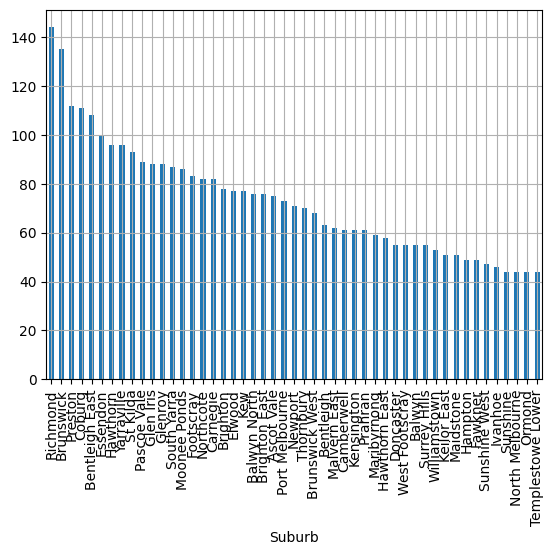

In [ ]:
df['Suburb'].value_counts()[1:50].plot.bar(grid=True)

##hist

array([[<Axes: title={'center': 'sale_no'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Propertycount'}>],
       [<Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'BuildingArea'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

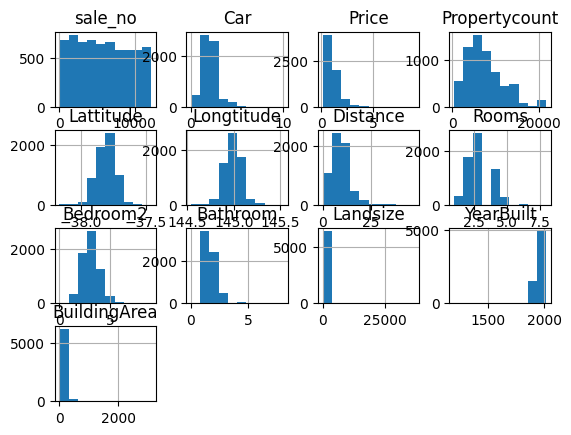

In [ ]:
df.hist()

## workshop - statistic


In [ ]:
#มีข้อมูลคอลัมน์ไหนที่ยังไม่เรียบร้อย และต้องทำการแก้ไขอะไรบ้าง จากนั้นแก้ให้เรียบร้อย
#ข้อมูลไหนมี Bias บ้าง (hint : YearBuilt, Suburb etc.)
#อธิบายลักษณะที่พบของข้อมูลราคาบ้าน (Price) ในแต่ละย่าน (Suburb) จากค่า Mean , Median และ histogram
#บ้านที่ถูกขายมากกว่า 1 ครั้งมีหลังใดบ้าง และอยู่ที่ย่านใด (Suburb)
#หาค่า Correlation และ Covariance เพื่อหาความสัมพันธ์ของราคาบ้าน (Price) และ ระยะทาง (Distance) แล้วอธิบายลักษณะข้อมูลที่พบ

In [ ]:
df.info()

In [ ]:
df.describe()

###Bias

> ข้อมูลไหนมี Bias บ้าง (hint : YearBuilt, Suburb etc.



In [ ]:
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
print(categorical_cols)

Index(['Address', 'CouncilArea', 'Date', 'Method', 'SellerG', 'Suburb',
       'Regionname', 'Postcode', 'Type'],
      dtype='object')


<Axes: xlabel='Suburb'>

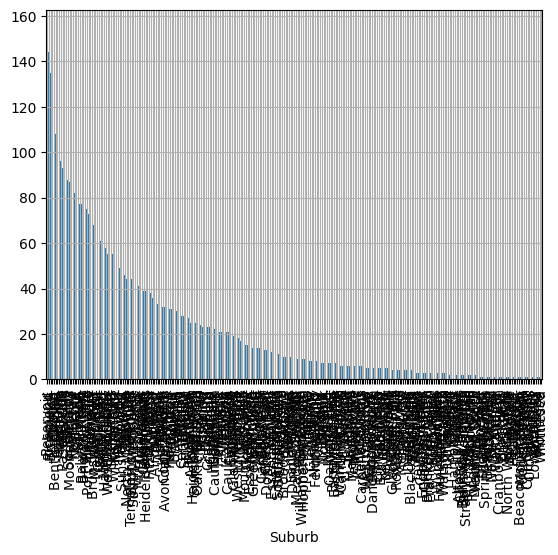

In [ ]:
df['Suburb'].value_counts().plot.bar(grid=True)

<Axes: ylabel='count'>

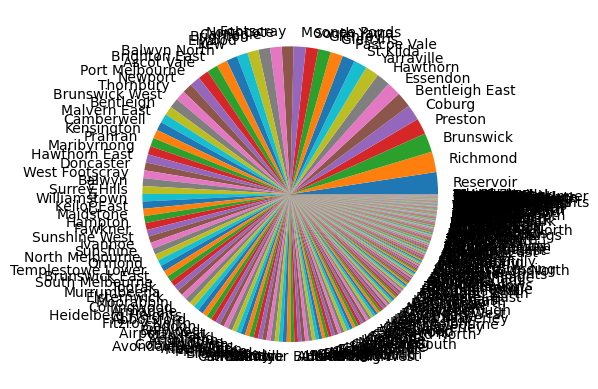

In [ ]:
df['Suburb'].value_counts().plot.pie()

In [ ]:
print(np.sum(df['Suburb'].value_counts() >=100))
print(np.sum((100 < df['Suburb'].value_counts()) & (df['Suburb'].value_counts() >= 50))) # Use & for element-wise AND comparison
print(np.sum((50 < df['Suburb'].value_counts()) & (df['Suburb'].value_counts() >= 25)))
print(np.sum((25 < df['Suburb'].value_counts()) & (df['Suburb'].value_counts() >= 12)))
print(np.sum((12 < df['Suburb'].value_counts()) & (df['Suburb'].value_counts() >= 6)))
print(np.sum(df['Suburb'].value_counts() < 6))

7
6
42
83
129
104


<Axes: ylabel='count'>

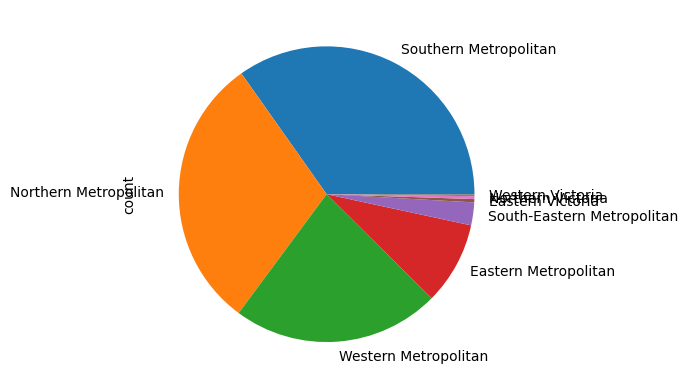

In [ ]:
df['Regionname'].value_counts().plot.pie()

<Axes: ylabel='count'>

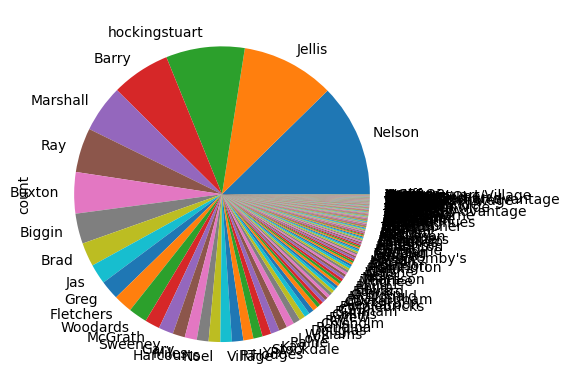

In [ ]:
df['SellerG'].value_counts().plot.pie()

<Axes: ylabel='count'>

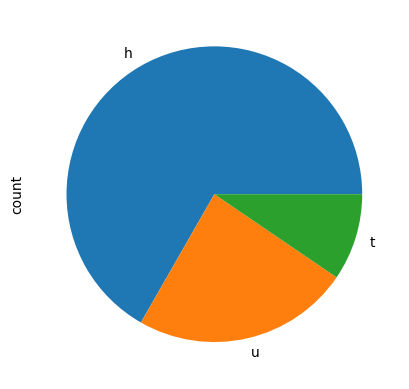

In [ ]:
df['Type'].value_counts().plot.pie()

###Mean,Median และ histogram
อธิบายลักษณะที่พบของข้อมูลราคาบ้าน (Price) ในแต่ละย่าน (Suburb) จากค่า Mean , Median และ histogram

In [ ]:
df['Suburb'].unique()

array(['Abbotsford', 'Glen Iris', 'Sunshine North', 'Airport West',
       'Albert Park', 'Northcote', 'Alphington', 'Altona', 'Altona North',
       'Armadale', 'Ascot Vale', 'Lalor', 'Ashburton', 'Ashwood',
       'Avondale Heights', 'Balwyn North', 'Balaclava', 'Balwyn',
       'Newport', 'Bentleigh', 'Brunswick West', 'Bentleigh East',
       'Maidstone', 'Box Hill', 'Bulleen', 'Braybrook', 'Coburg',
       'Brighton', 'Mount Waverley', 'Brighton East', 'Jacana', 'Croydon',
       'Canterbury', 'Moorabbin', 'Deer Park', 'Brunswick', 'Maribyrnong',
       'Richmond', 'Essendon West', 'Yarraville', 'Murrumbeena',
       'Hawthorn', 'Burwood', 'Camberwell', 'Carlton North', 'Carnegie',
       'Caulfield', 'Caulfield North', 'Preston', 'Caulfield South',
       'Chadstone', 'Clifton Hill', 'Moonee Ponds', 'Coburg North',
       'Hampton', 'Essendon North', 'Collingwood', 'Doncaster',
       'Eaglemont', 'Elsternwick', 'Elwood', 'Essendon', 'Fairfield',
       'Fitzroy', 'Fitzroy North'

In [ ]:
df['Suburb'].value_counts()

Suburb
Reservoir       155
Richmond        144
Brunswick       135
Preston         112
Coburg          111
               ... 
Knoxfield         1
Lower Plenty      1
St Helena         1
Montrose          1
Whittlesea        1
Name: count, Length: 287, dtype: int64

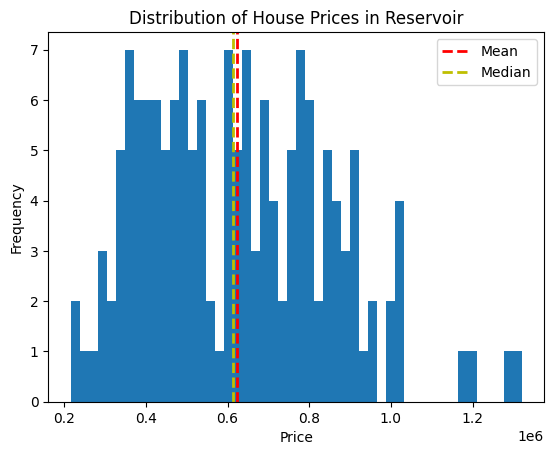

In [ ]:
# Filter the DataFrame for the suburb 'Reservoir'
reservoir_data = df[df['Suburb'] == 'Reservoir']

# Calculate mean and median for 'Price' in Reservoir
mean_price = reservoir_data['Price'].mean()
median_price = reservoir_data['Price'].median()

# Plot the histogram
plt.hist(reservoir_data['Price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices in Reservoir')

# Add vertical lines for mean and median
plt.axvline(mean_price, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_price, color='y', linestyle='dashed', linewidth=2, label='Median')

plt.legend()
plt.show()


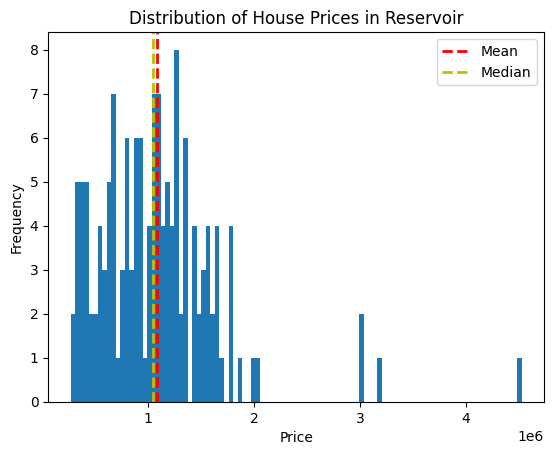

In [ ]:
# Filter the DataFrame for the suburb 'Reservoir'
reservoir_data = df[df['Suburb'] == 'Richmond']

# Calculate mean and median for 'Price' in Reservoir
mean_price = reservoir_data['Price'].mean()
median_price = reservoir_data['Price'].median()

# Plot the histogram
plt.hist(reservoir_data['Price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices in Reservoir')

# Add vertical lines for mean and median
plt.axvline(mean_price, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_price, color='y', linestyle='dashed', linewidth=2, label='Median')

plt.legend()
plt.show()

###House
บ้านที่ถูกขายมากกว่า 1 ครั้งมีหลังใดบ้าง และอยู่ที่ย่านใด (Suburb)

In [ ]:
# Calculate value counts
df_counts = df['Address'].value_counts()

# Filter with counts greater than xx
sale_more_than_one = df_counts[df_counts >1]

# Filter the original DataFrame using 'isin'
filtered_df = df[df['Address'].isin(sale_more_than_one.index)]

# Display the filtered DataFrame
filtered_df[['Address','Regionname','Suburb','CouncilArea','Postcode','YearBuilt','Car','BuildingArea','Date']].sort_values(['Address','Regionname','Suburb'])

,Address,Regionname,Suburb,CouncilArea,Postcode,YearBuilt,Car,BuildingArea,Date
5180,1 Bellarine St,Northern Metropolitan,Preston,Darebin,3072.0,1925,2,217.0,18/03/2017
5181,1 Bellarine St,Northern Metropolitan,Preston,Darebin,3072.0,1925,2,217.0,18/03/2017
5182,1 Bellarine St,Northern Metropolitan,Preston,Darebin,3072.0,1925,2,217.0,3/06/2017
5183,1 Bellarine St,Northern Metropolitan,Preston,Darebin,3072.0,1925,2,217.0,3/06/2017
8386,1/1 Clarendon St,Western Metropolitan,Maidstone,Maribyrnong,3012.0,2016,2,128.0,22/04/2017
...,...,...,...,...,...,...,...,...,...
5349,9/99 Barton St,Northern Metropolitan,Reservoir,Darebin,3073.0,2012,1,54.0,22/08/2016
3391,97 Edwin St,Eastern Metropolitan,Heidelberg Heights,Banyule,3081.0,1930,2,120.0,3/09/2016
3392,97 Edwin St,Eastern Metropolitan,Heidelberg Heights,Banyule,3081.0,1930,2,120.0,3/09/2016
3393,97 Edwin St,Eastern Metropolitan,Heidelberg Heights,Banyule,3081.0,1930,4,120.0,12/08/2017


In [ ]:
df['Address'].value_counts()

Address
14 Arthur St       9
5 Margaret St      9
13 Robinson St     9
5 Charles St       9
53 William St      9
                  ..
50 Hunter St       1
20 Gordon Gr       1
7 Hunter St        1
18 Soudan St       1
54 Pentland Pde    1
Name: count, Length: 6125, dtype: int64

In [ ]:
filtered_df.groupby('Suburb')['Address'].count().max()

19

###Correlation, Covariance
หาค่า Correlation และ Covariance เพื่อหาความสัมพันธ์ของราคาบ้าน (Price) และ ระยะทาง (Distance) แล้วอธิบายลักษณะข้อมูลที่พบ

In [ ]:
df[['Price','Distance']].cov()

,Price,Distance
Price,4.540094e+11,-548192.902721
Distance,-5.481929e+05,31.188641


In [ ]:
df[['Price','Distance']].corr()

,Price,Distance
Price,1.000000,-0.145681
Distance,-0.145681,1.000000


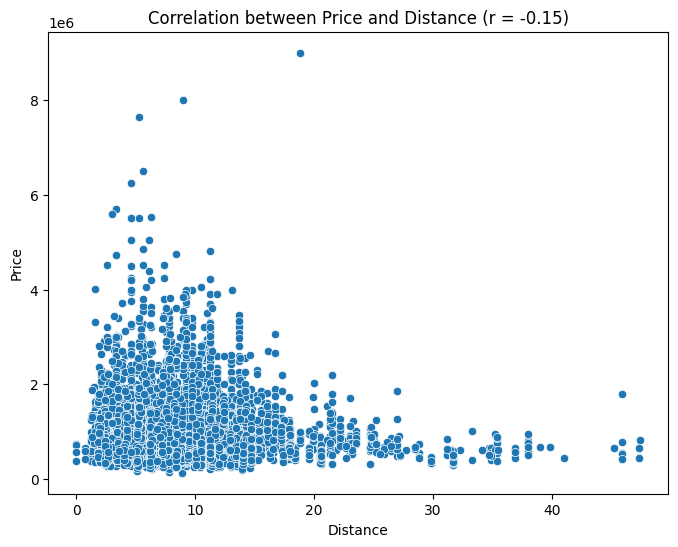

In [ ]:
# Calculate the correlation coefficient
correlation = df['Price'].corr(df['Distance'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Distance', y='Price', data=df)
plt.title(f'Correlation between Price and Distance (r = {correlation:.2f})')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()


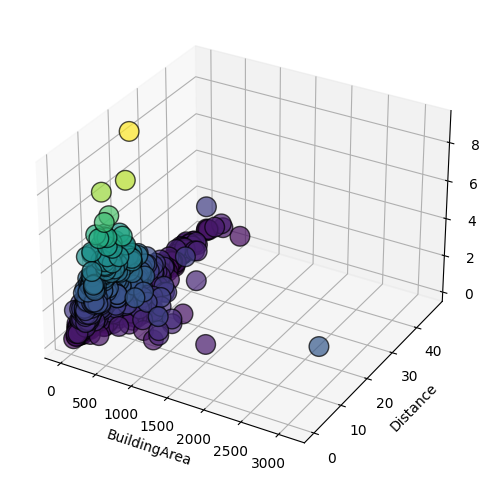

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['BuildingArea'], df['Distance'], df['Price'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,c=df['Price'])
plt.xlabel('BuildingArea')
plt.ylabel('Distance')
ax.set_zlabel('Price') # Use ax.set_zlabel() to set the z-axis label
plt.show()

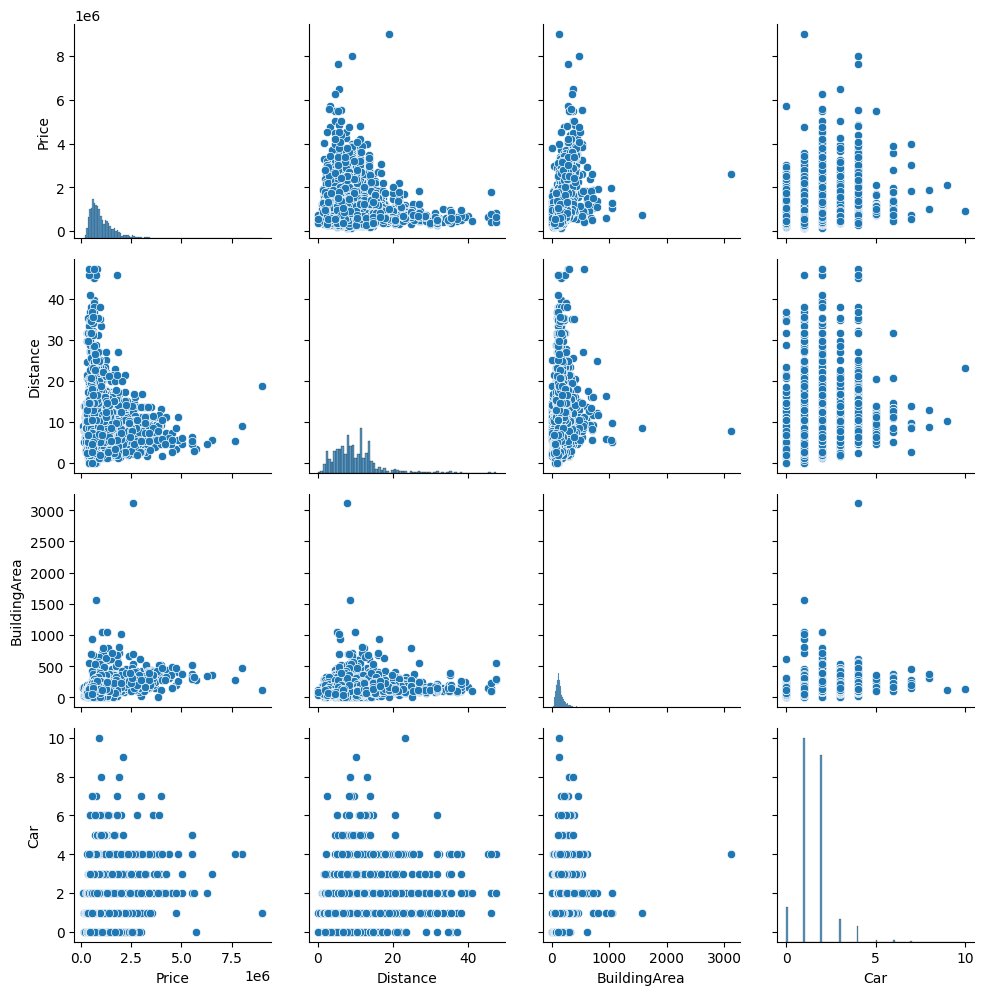

In [ ]:
g = sns.PairGrid(df[['Price','Distance','BuildingArea','Car']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

#groupby
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [ ]:
df.groupby('Regionname')['Price'].mean()

Regionname
Eastern Metropolitan          1.112667e+06
Eastern Victoria              6.699992e+05
Northern Metropolitan         8.825760e+05
Northern Victoria             6.183000e+05
South-Eastern Metropolitan    9.322459e+05
Southern Metropolitan         1.374272e+06
Western Metropolitan          8.832687e+05
Western Victoria              3.910714e+05
Name: Price, dtype: float64

<Axes: xlabel='Regionname'>

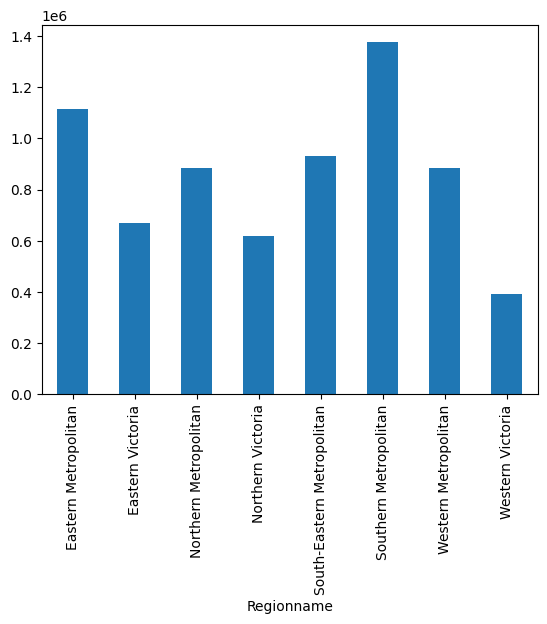

In [ ]:
df.groupby('Regionname')['Price'].mean().plot.bar()

<Axes: xlabel='Regionname'>

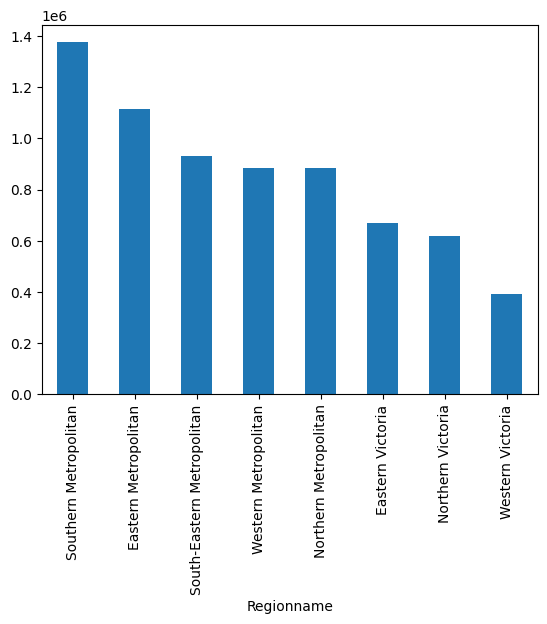

In [ ]:
df.groupby('Regionname')['Price'].mean().sort_values(ascending=False).plot.bar()

<Axes: xlabel='Regionname'>

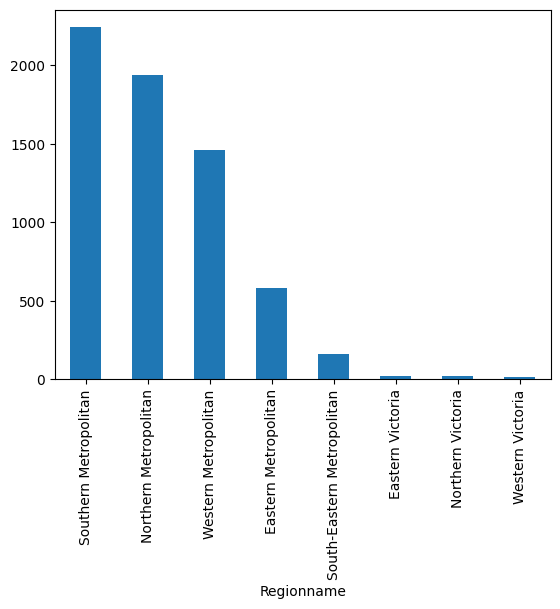

In [ ]:
df.value_counts('Regionname').plot.bar()

#pivot_table
https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [ ]:
pd.pivot_table(df, values=['Price'], index='Regionname', margins=True, aggfunc='mean')

,Price
Regionname,
Eastern Metropolitan,1.112667e+06
Eastern Victoria,6.699992e+05
Northern Metropolitan,8.825760e+05
Northern Victoria,6.183000e+05
South-Eastern Metropolitan,9.322459e+05
Southern Metropolitan,1.374272e+06
Western Metropolitan,8.832687e+05
Western Victoria,3.910714e+05
All,1.073156e+06


In [ ]:
pd.pivot_table(df, values=['Price','Distance','BuildingArea','Car'], index='Regionname')

,BuildingArea,Car,Distance,Price
Regionname,,,,
Eastern Metropolitan,163.907942,1.821612,13.620583,1.112667e+06
Eastern Victoria,185.319565,2.000000,34.486957,6.699992e+05
Northern Metropolitan,122.368164,1.414647,7.807375,8.825760e+05
Northern Victoria,154.674000,1.950000,35.325000,6.183000e+05
South-Eastern Metropolitan,157.492517,1.956522,24.003106,9.322459e+05
Southern Metropolitan,151.418669,1.547725,8.730999,1.374272e+06
Western Metropolitan,145.143497,1.658470,9.708538,8.832687e+05
Western Victoria,148.525714,1.857143,30.750000,3.910714e+05


In [ ]:
pd.pivot_table(df, values=['Price'], index='Regionname', aggfunc=['mean','sum'])

,mean,sum
,Price,Price
Regionname,,
Eastern Metropolitan,1.112667e+06,6.486850e+08
Eastern Victoria,6.699992e+05,1.540998e+07
Northern Metropolitan,8.825760e+05,1.711315e+09
Northern Victoria,6.183000e+05,1.236600e+07
South-Eastern Metropolitan,9.322459e+05,1.500916e+08
Southern Metropolitan,1.374272e+06,3.081117e+09
Western Metropolitan,8.832687e+05,1.293105e+09
Western Victoria,3.910714e+05,5.475000e+06


In [ ]:
pd.pivot_table(df, values=['Price','Distance','BuildingArea','Car'], index='Regionname',
               aggfunc={'Price':'sum', 'Distance':'mean', 'BuildingArea':np.sum, 'Car':np.max})

,BuildingArea,Car,Distance,Price
Regionname,,,,
Eastern Metropolitan,95558.3300,10,13.620583,6.486850e+08
Eastern Victoria,4262.3500,4,34.486957,1.540998e+07
Northern Metropolitan,237271.8700,8,7.807375,1.711315e+09
Northern Victoria,3093.4800,4,35.325000,1.236600e+07
South-Eastern Metropolitan,25356.2952,6,24.003106,1.500916e+08
Southern Metropolitan,339480.6564,9,8.730999,3.081117e+09
Western Metropolitan,212490.0800,8,9.708538,1.293105e+09
Western Victoria,2079.3600,4,30.750000,5.475000e+06


<Axes: xlabel='Regionname'>

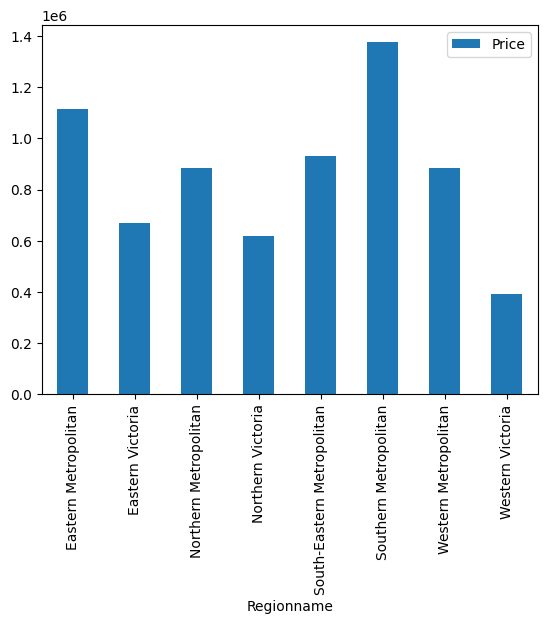

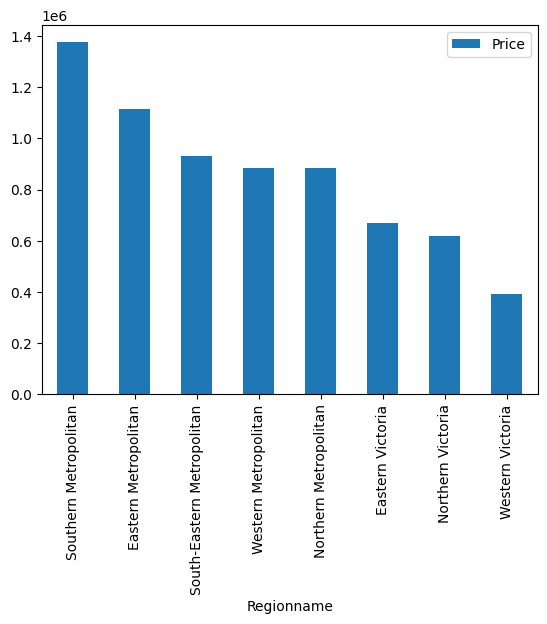

In [ ]:
pvt = pd.pivot_table(df, values=['Price'], index='Regionname', aggfunc='mean')
pvt.plot.bar()
pvt.sort_values(by='Price', ascending=False).plot.bar()

In [ ]:
pd.pivot_table(df, values=['Price'],columns='Type',index='Regionname', aggfunc='sum')

Price                          
Type                                   h            t            u
Regionname                                                        
Eastern Metropolitan        5.538058e+08   46334850.0   48544300.0
Eastern Victoria            1.496298e+07          NaN     447000.0
Northern Metropolitan       1.323251e+09  137397500.0  250666029.0
Northern Victoria           1.236600e+07          NaN          NaN
South-Eastern Metropolitan  1.317313e+08   10769750.0    7590500.0
Southern Metropolitan       2.351071e+09  243370400.0  486676248.0
Western Metropolitan        1.076477e+09  106451200.0  110176944.0
Western Victoria            5.475000e+06          NaN          NaN

In [ ]:
pvt = pd.pivot_table(df, values=['Price'],index='Regionname', aggfunc=['count','sum'])
pvt.columns = pvt.columns.droplevel(1) # Flatten the columns
pvt.sort_values(by='count', ascending=False) # Sort by 'count' column

,count,sum
Regionname,,
Southern Metropolitan,2242,3.081117e+09
Northern Metropolitan,1939,1.711315e+09
Western Metropolitan,1464,1.293105e+09
Eastern Metropolitan,583,6.486850e+08
South-Eastern Metropolitan,161,1.500916e+08
Eastern Victoria,23,1.540998e+07
Northern Victoria,20,1.236600e+07
Western Victoria,14,5.475000e+06


In [ ]:
df.value_counts('Regionname')

Regionname
Southern Metropolitan         2242
Northern Metropolitan         1939
Western Metropolitan          1464
Eastern Metropolitan           583
South-Eastern Metropolitan     161
Eastern Victoria                23
Northern Victoria               20
Western Victoria                14
Name: count, dtype: int64

#Task


In [ ]:
#เปรียบเทียบยอดขายของพนักงานขายแต่ละคน (Plot 7 คนแรก)
#เปรียบเทียบยอดขายของที่พักอาศัยแต่ละประเภท
#จำนวนการขายที่พักอาศัยในแต่ละภูมิภาค

#อายุบ้านกับราคา
#ยอดขายในแต่ละปี

In [52]:
df.to_csv('data_from_jarn.csv', index=False)